In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import pylab 
import matplotlib.pyplot as plt
%matplotlib inline


df1 = pd.read_csv("Training_part1.csv", sep=";")
df2 = pd.read_csv("Training_part2.csv", sep=";")
df_orginial = pd.concat([df1, df2], axis=1, join="inner") #join two dataframes
df_orginial.head()

,BIB,COD,ERG,FAN,GJAH,LUK,MYR,NUS,PKD,RAS,id,SIS,TOK,UIN,VOL,WET,KAT,XIN,Class,id
0,160,iii,www,80.0,iii,5.0,eee,800000.0,xxx,t,0,1.750,t,17.92,f,1,ccc,t,n,0
1,153,uuu,aaa,200.0,rrr,0.0,mmm,2000000.0,xxx,NaN,1,0.290,f,16.92,f,0,ddd,f,n,1
2,5,iii,www,96.0,iii,19.0,hh,960000.0,hh,t,2,0.000,f,31.25,f,1,ddd,t,n,2
3,9,iii,www,0.0,iii,120.0,kkk,0.0,qqq,NaN,3,0.335,f,48.17,f,0,ccc,f,n,3
4,40,iii,www,232.0,iii,0.0,mmm,2320000.0,xxx,f,4,0.500,t,32.33,f,0,ddd,f,n,4


In [2]:
#Drop id column
df = df_orginial.drop(["id"], axis=1)
df.head()

,BIB,COD,ERG,FAN,GJAH,LUK,MYR,NUS,PKD,RAS,SIS,TOK,UIN,VOL,WET,KAT,XIN,Class
0,160,iii,www,80.0,iii,5.0,eee,800000.0,xxx,t,1.750,t,17.92,f,1,ccc,t,n
1,153,uuu,aaa,200.0,rrr,0.0,mmm,2000000.0,xxx,NaN,0.290,f,16.92,f,0,ddd,f,n
2,5,iii,www,96.0,iii,19.0,hh,960000.0,hh,t,0.000,f,31.25,f,1,ddd,t,n
3,9,iii,www,0.0,iii,120.0,kkk,0.0,qqq,NaN,0.335,f,48.17,f,0,ccc,f,n
4,40,iii,www,232.0,iii,0.0,mmm,2320000.0,xxx,f,0.500,t,32.33,f,0,ddd,f,n


In [3]:
df.shape

(4070, 18)

In [4]:
df.describe()

,BIB,FAN,LUK,NUS,SIS,UIN,WET
count,4070.000000,3966.000000,4070.000000,3.966000e+03,4070.000000,4028.000000,4070.000000
mean,96.270270,162.526979,2322.720393,1.625270e+06,3.412081,32.837974,4.141032
std,56.131058,154.966817,9104.752893,1.549668e+06,4.322153,12.709425,6.696288
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,13.750000,0.000000
25%,47.000000,0.000000,0.000000,0.000000e+00,0.500000,22.920000,0.000000
50%,101.000000,120.000000,134.000000,1.200000e+06,1.750000,28.670000,2.000000
75%,152.000000,280.000000,1000.000000,2.800000e+06,5.000000,40.830000,6.000000
max,179.000000,1160.000000,100000.000000,1.160000e+07,28.500000,80.250000,67.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BIB     4070 non-null   int64  
 1   COD     4070 non-null   object 
 2   ERG     4006 non-null   object 
 3   FAN     3966 non-null   float64
 4   GJAH    4006 non-null   object 
 5   LUK     4070 non-null   float64
 6   MYR     4004 non-null   object 
 7   NUS     3966 non-null   float64
 8   PKD     4004 non-null   object 
 9   RAS     1705 non-null   object 
 10  SIS     4070 non-null   float64
 11  TOK     4070 non-null   object 
 12  UIN     4028 non-null   float64
 13  VOL     4070 non-null   object 
 14  WET     4070 non-null   int64  
 15  KAT     4027 non-null   object 
 16  XIN     4070 non-null   object 
 17  Class   4070 non-null   object 
dtypes: float64(5), int64(2), object(11)
memory usage: 572.5+ KB


### Check for Class imbalance

y    3764
n     306
Name: Class, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Class'>

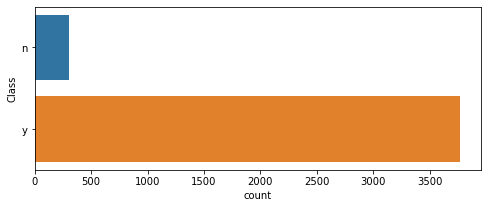

In [6]:
label = df.Class.value_counts()
print(label)

plt.figure(figsize=(8, 3))
sns.countplot(y="Class", data=df)

**QUICK NOTES:**

* As we can see, this is a skewed class distribution, i.e, imbalanced dataset
* F-1 score may be considered as the performance metric since it considers both Type 1 and Type 2 errors
* To consider: Oversampling methods (smote or smote_tomek) to impute and increase the rare class label (n) and consider the relevant metrics (Confision Matrix, Accuracy) accordingly

### Visualize Missing values in the dataframe

<AxesSubplot:>

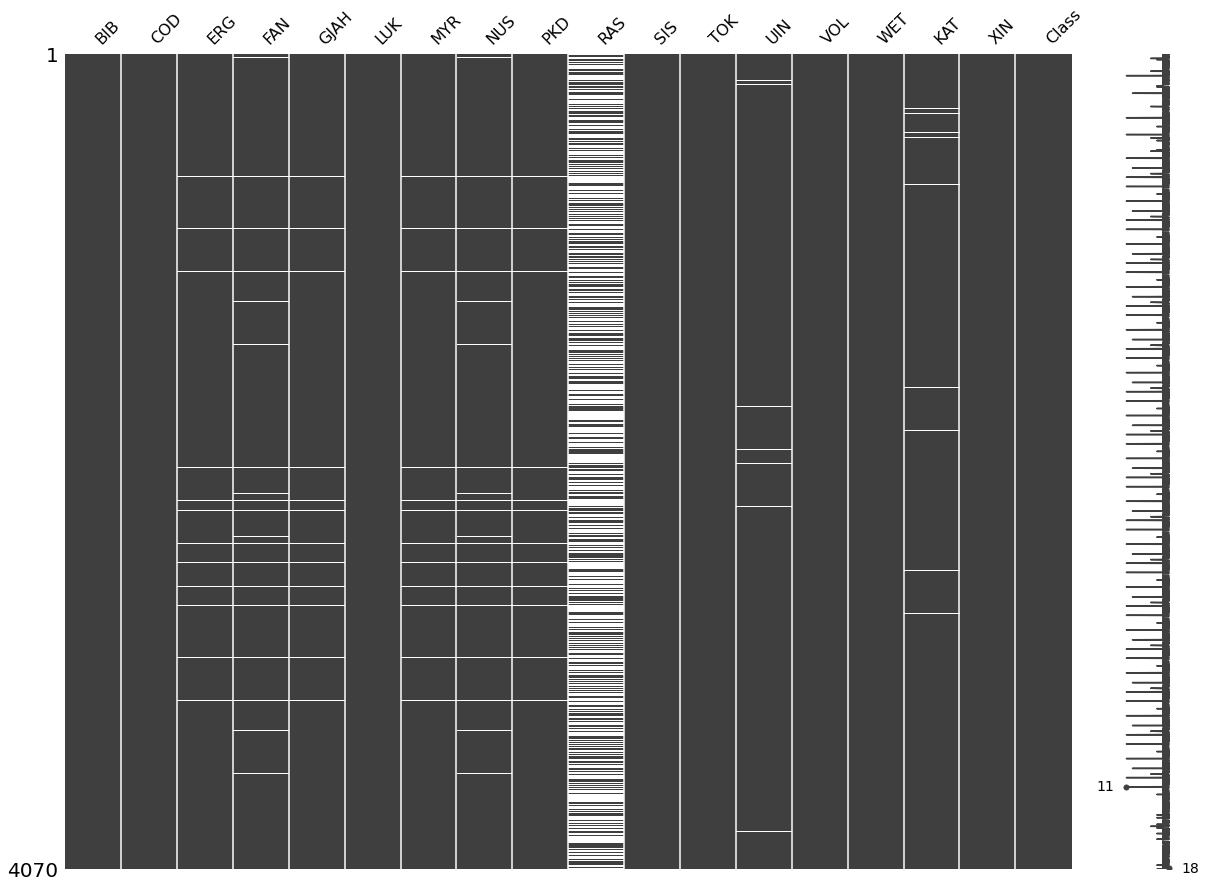

In [7]:
import missingno
missingno.matrix(df, figsize=(20, 15))

<Figure size 1440x1440 with 0 Axes>

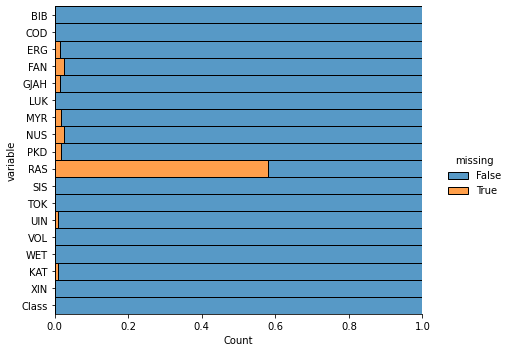

<Figure size 1440x1440 with 0 Axes>

In [8]:
sns.displot(df.isna().melt(value_name="missing"), 
            y="variable", hue="missing", multiple="fill", 
            aspect=1.25)
plt.figure(figsize=(20,20))

# Feature Engineering: Continous Variables
* Imputation
* Feature Selection
* Scaling

In [9]:
#select columns containing continous values from the original dataframe df
df_num = df.select_dtypes(include=['integer', 'float'])
df_num.head()

,BIB,FAN,LUK,NUS,SIS,UIN,WET
0,160,80.0,5.0,800000.0,1.750,17.92,1
1,153,200.0,0.0,2000000.0,0.290,16.92,0
2,5,96.0,19.0,960000.0,0.000,31.25,1
3,9,0.0,120.0,0.0,0.335,48.17,0
4,40,232.0,0.0,2320000.0,0.500,32.33,0


In [10]:
df_num.isnull().sum()

BIB      0
FAN    104
LUK      0
NUS    104
SIS      0
UIN     42
WET      0
dtype: int64

<AxesSubplot:>

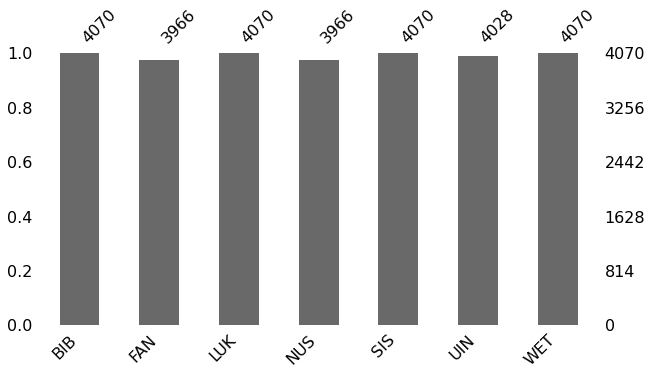

In [11]:
#Visualize missing spaces
missingno.bar(df_num, figsize=(10, 5))

**Quick Notes:** 
* No major missing values to drop
* We will perfrom median imputation to fill in the missing values

In [12]:
#impute with median values
df_num['FAN'].fillna(df_num.FAN.median(),inplace=True)
df_num['NUS'].fillna(df_num.NUS.median(),inplace=True)
df_num['UIN'].fillna(df_num.UIN.median(),inplace=True)


### Feature Selection

<AxesSubplot:>

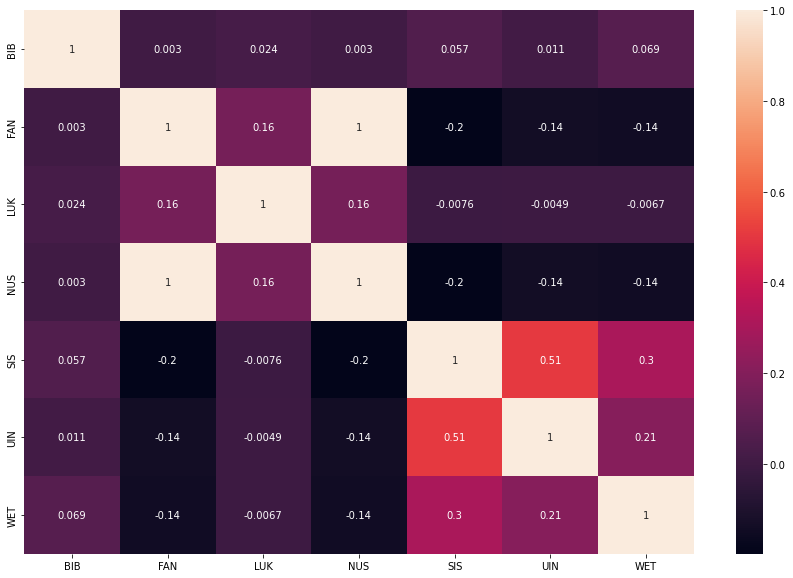

In [13]:
#Correlation heatmap
corr = df_num.corr()
top_features = corr.index
plt.figure(figsize=(15,10))
sns.heatmap(df_num[top_features].corr(),annot=True)

In [14]:
# find and remove correlated features

threshold = .9

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df_num.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(df_num, threshold)
print(len(set(corr_features)))
corr_features

1


{'NUS'}

In [16]:
#Drop all correlated features
df_num = df_num.drop((corr_features), axis=1)
df_num.head()

,BIB,FAN,LUK,SIS,UIN,WET
0,160,80.0,5.0,1.750,17.92,1
1,153,200.0,0.0,0.290,16.92,0
2,5,96.0,19.0,0.000,31.25,1
3,9,0.0,120.0,0.335,48.17,0
4,40,232.0,0.0,0.500,32.33,0


<AxesSubplot:>

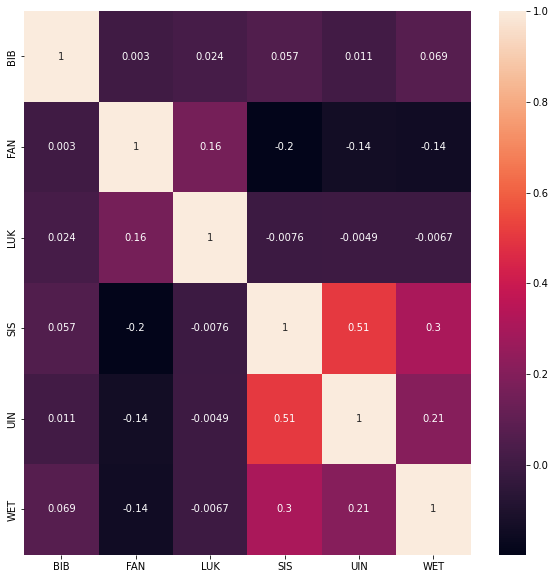

In [17]:
#Correlation heatmap
corr = df_num.corr()
top_features = corr.index
plt.figure(figsize=(10,10))
sns.heatmap(df_num[top_features].corr(),annot=True)

**QUICK NOTES**

* No Correlation between continous independent features 

### Check Distributions 

In [18]:
#Q-Q plot to check whether feature is guassian or normal distributed
def plot_data(df_num,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df_num[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df_num[feature],dist='norm',plot=pylab)
    plt.show()

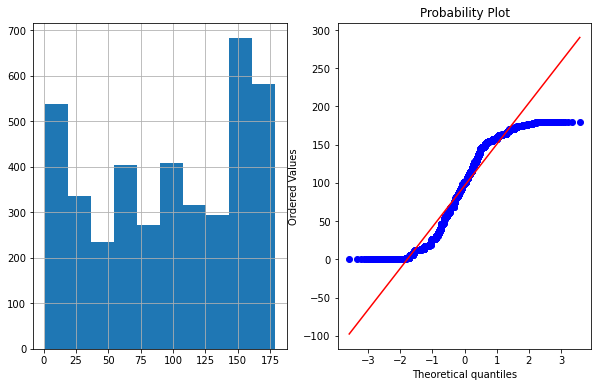

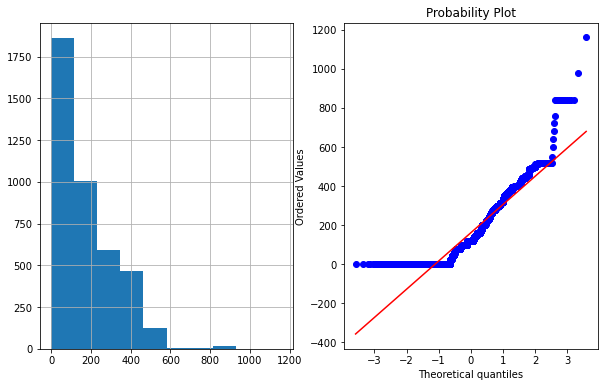

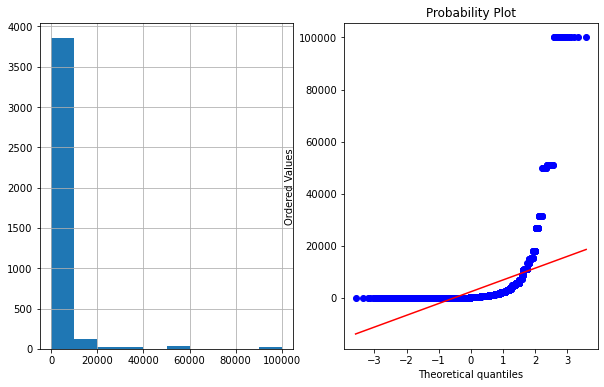

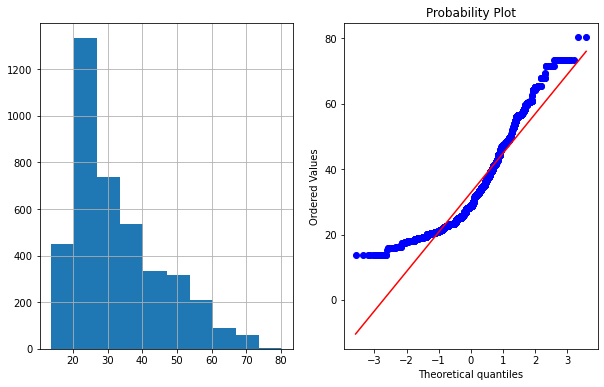

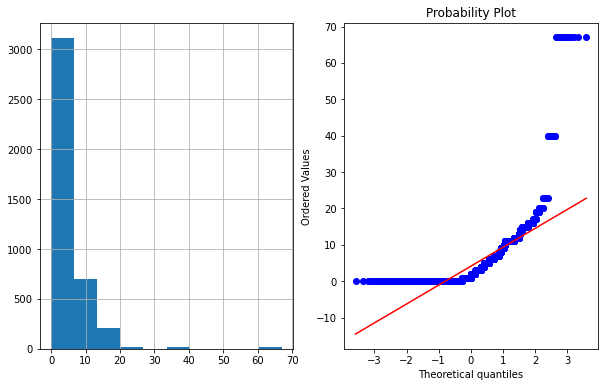

In [19]:
plot_data(df,'BIB')
plot_data(df,'FAN')
plot_data(df,'LUK')
plot_data(df,'UIN')
plot_data(df,'WET')

### Check for outliers

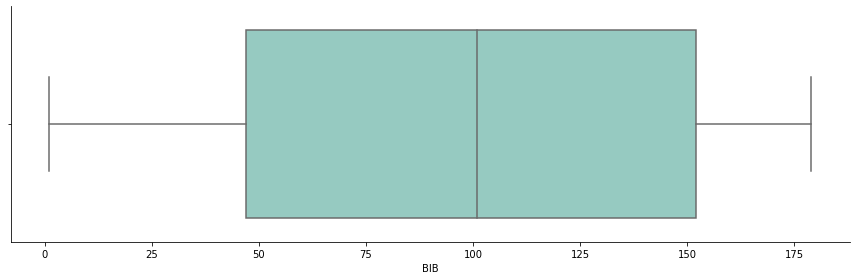

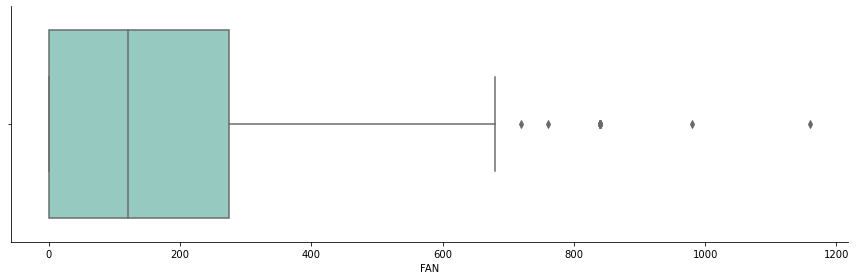

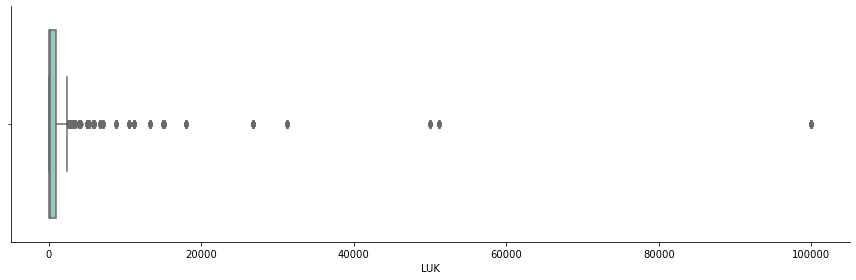

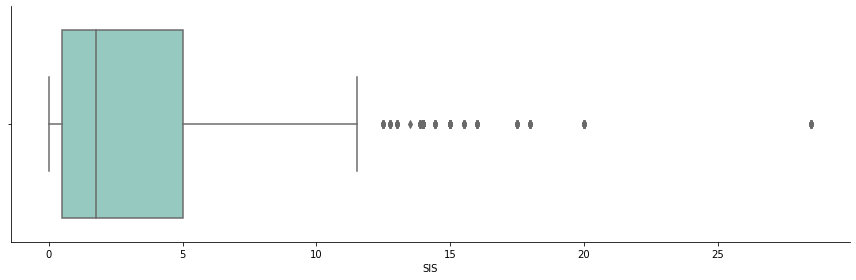

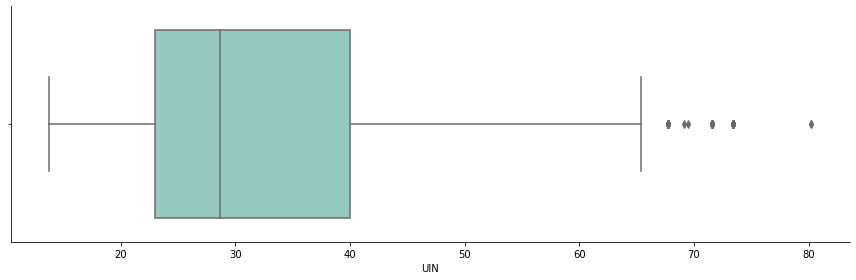

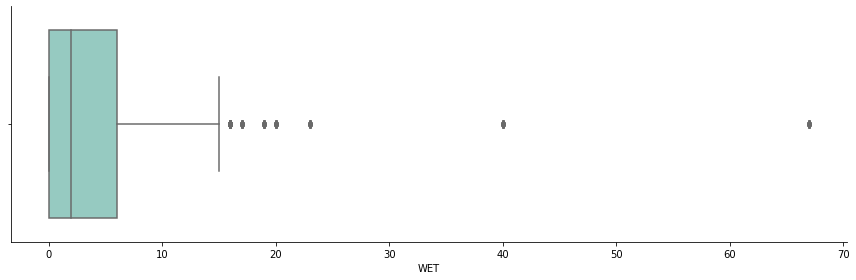

In [20]:
cat_features = df_num.columns.to_list()
for col in cat_features:
    sns.catplot(x=col, kind="box", dodge=False, height = 4, aspect = 3, data=df_num, palette="Set3")

**Note: As we can see there are quite a few outliers, we will scale the datasets using robustscaler library**

### Feature Scaling

In [21]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# df_num = scaler.fit_transform(df_num)
# df_num

In [22]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# df_num = pd.DataFrame(scaler.fit_transform(df_num),columns = df_num.columns)
# df_num.head()

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_num = pd.DataFrame(scaler.fit_transform(df_num),columns=df_num.columns)
df_num.head()

,BIB,FAN,LUK,SIS,UIN,WET
0,0.893258,0.068966,0.00005,0.061404,0.062707,0.014925
1,0.853933,0.172414,0.00000,0.010175,0.047669,0.000000
2,0.022472,0.082759,0.00019,0.000000,0.263158,0.014925
3,0.044944,0.000000,0.00120,0.011754,0.517594,0.000000
4,0.219101,0.200000,0.00000,0.017544,0.279398,0.000000


# Feature Engineering : Categorical Features
* Treat Missing values 
* Encode 

In [24]:
#select columns containing categorical values from the original dataframe df
df_cat = df.select_dtypes(include=["object"])
df_cat.head()

,COD,ERG,GJAH,MYR,PKD,RAS,TOK,VOL,KAT,XIN,Class
0,iii,www,iii,eee,xxx,t,t,f,ccc,t,n
1,uuu,aaa,rrr,mmm,xxx,NaN,f,f,ddd,f,n
2,iii,www,iii,hh,hh,t,f,f,ddd,t,n
3,iii,www,iii,kkk,qqq,NaN,f,f,ccc,f,n
4,iii,www,iii,mmm,xxx,f,t,f,ddd,f,n


In [25]:
df_cat.shape

(4070, 11)

COD         0
ERG        64
GJAH       64
MYR        66
PKD        66
RAS      2365
TOK         0
VOL         0
KAT        43
XIN         0
Class       0
dtype: int64


<AxesSubplot:>

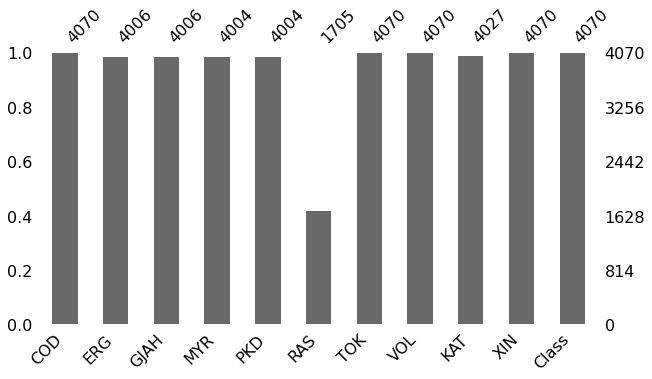

In [26]:
#Count and Visualize missing spaces
print(df_cat.isnull().sum())
missingno.bar(df_cat, figsize=(10, 5))

**Notes** 
* RAS column has considerably high number of missing values, so we can drop it altogether
* We will perform mode imputation (frequency) to fill in the missing values on the rest of the categorical columns

t    1115
f     590
Name: RAS, dtype: int64


<AxesSubplot:xlabel='count', ylabel='RAS'>

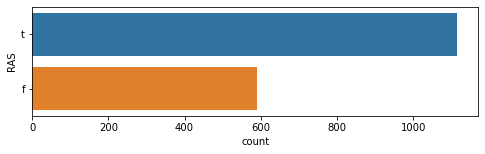

In [27]:
# Check distribution on RAS feature
ras_dist = df_cat.RAS.value_counts()
print(ras_dist)

plt.figure(figsize=(8, 2))
sns.countplot(y="RAS", data = df_cat)

In [28]:
df_cat = df_cat.drop(["RAS"], axis=1)
df_cat.head()

,COD,ERG,GJAH,MYR,PKD,TOK,VOL,KAT,XIN,Class
0,iii,www,iii,eee,xxx,t,f,ccc,t,n
1,uuu,aaa,rrr,mmm,xxx,f,f,ddd,f,n
2,iii,www,iii,hh,hh,f,f,ddd,t,n
3,iii,www,iii,kkk,qqq,f,f,ccc,f,n
4,iii,www,iii,mmm,xxx,t,f,ddd,f,n


Note: RAS has huge number of missing values, so we can drop it altogether

In [29]:
df_cat.isnull().sum()

COD       0
ERG      64
GJAH     64
MYR      66
PKD      66
TOK       0
VOL       0
KAT      43
XIN       0
Class     0
dtype: int64

In [30]:
#Mode imputation based on
def impute_nan(df,cat_feature):
    most_frequent_category = df[cat_feature].mode()[0]
    df[cat_feature].fillna(most_frequent_category,inplace=True)

In [31]:
for feature in ['ERG','GJAH','MYR', 'PKD', 'KAT']:
    impute_nan(df_cat,feature)

In [32]:
#Confirm for no missing values
df_cat.isnull().sum()


COD      0
ERG      0
GJAH     0
MYR      0
PKD      0
TOK      0
VOL      0
KAT      0
XIN      0
Class    0
dtype: int64

### Feature Selection

In [33]:
# let's quickly check the dimension of OneHot encoded dataframe before preprocessing 
pd.get_dummies(df_cat, drop_first=True).shape

(4070, 30)

**Quick Notes:**

* Num. of Categorical variables = 30
* Num. of Continous variables = 6

***Total Columns before OneHot encoding: 30 + 6 = 36 columns***

In [34]:
# Unique values
for col in df_cat:
    print(df_cat[col].unique())

['iii' 'uuu' 'rrr']
['www' 'aaa' 'nnn']
['iii' 'rrr' 'ii']
['eee' 'mmm' 'hh' 'kkk' 'lll' 'sss' 'yyy' 'fff' 'ooo' 'ee' 'ttt' 'zzz'
 'ggg']
['xxx' 'hh' 'qqq' 'jjj' 'lll' 'ff' 'ppp' 'bbb']
['t' 'f']
['f' 't']
['ccc' 'ddd']
['t' 'f']
['n' 'y']


In [35]:
# let's have a look at how many labels each variable has
for feature in df_cat.columns[:]:
    print(feature,":",len(df_cat[feature].unique()),'labels')

COD : 3 labels
ERG : 3 labels
GJAH : 3 labels
MYR : 13 labels
PKD : 8 labels
TOK : 2 labels
VOL : 2 labels
KAT : 2 labels
XIN : 2 labels
Class : 2 labels


**Quick Notes:**

* We will now examine the disbribution of each feature
* We are interested mainly on values of MYR and PKD features, based on most frequent labels
* This method works best when value_counts is huge and we get an explodingly huge dimension
* **Source**: http://proceedings.mlr.press/v7/niculescu09/niculescu09.pdf


eee    927
sss    687
ee     600
yyy    396
zzz    381
kkk    210
ooo    194
mmm    188
ggg    153
hh     150
fff    102
lll     43
ttt     39
Name: MYR, dtype: int64


<AxesSubplot:xlabel='count', ylabel='MYR'>

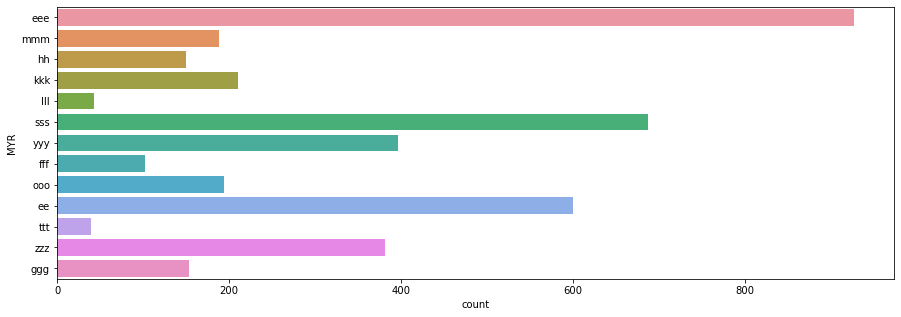

In [36]:
# Check distribution on MYR feature
myr_dist = df_cat.MYR.value_counts().sort_values(ascending=False)
print(myr_dist)

plt.figure(figsize=(15, 5))
sns.countplot(y="MYR", data=df_cat)

In [37]:
# let's make a list with the most frequent categories of the variable
top_10_labels = [y for y in df_cat.MYR.value_counts().sort_values(ascending=False).head(10).index]
top_10_labels

['eee', 'sss', 'ee', 'yyy', 'zzz', 'kkk', 'ooo', 'mmm', 'ggg', 'hh']

In [38]:
# Lets define a function to get the whole set of dummy variables
def Onehot_top_n(df, feature, top_n_labels):  
    for label in top_n_labels:
        df_cat[feature+'_'+label] = np.where(df_cat[feature]==label, 1, 0)

In [39]:
# Lets call the function to encode variable MYR into the 10 most frequent categories
Onehot_top_n(df_cat, 'MYR', top_10_labels)
df_cat.head()

,COD,ERG,GJAH,MYR,PKD,TOK,VOL,KAT,XIN,Class,MYR_eee,MYR_sss,MYR_ee,MYR_yyy,MYR_zzz,MYR_kkk,MYR_ooo,MYR_mmm,MYR_ggg,MYR_hh
0,iii,www,iii,eee,xxx,t,f,ccc,t,n,1,0,0,0,0,0,0,0,0,0
1,uuu,aaa,rrr,mmm,xxx,f,f,ddd,f,n,0,0,0,0,0,0,0,1,0,0
2,iii,www,iii,hh,hh,f,f,ddd,t,n,0,0,0,0,0,0,0,0,0,1
3,iii,www,iii,kkk,qqq,f,f,ccc,f,n,0,0,0,0,0,1,0,0,0,0
4,iii,www,iii,mmm,xxx,t,f,ddd,f,n,0,0,0,0,0,0,0,1,0,0


xxx    2286
jjj    1078
ff      388
hh      166
bbb      53
ppp      39
lll      38
qqq      22
Name: PKD, dtype: int64


<AxesSubplot:xlabel='count', ylabel='PKD'>

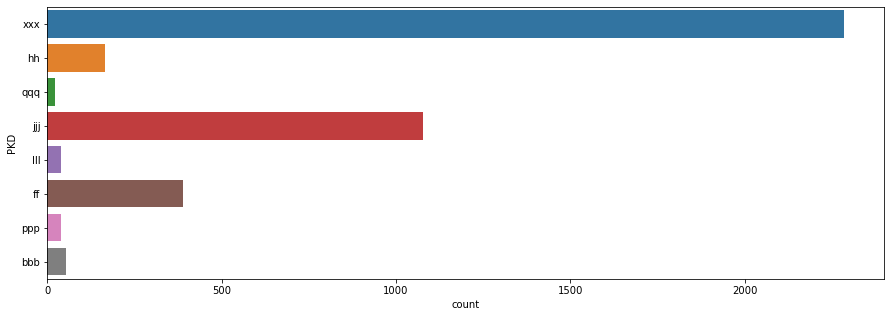

In [40]:
# Check distribution on PKD feature
pkd_dist = df_cat.PKD.value_counts()
print(pkd_dist)

plt.figure(figsize=(15, 5))
sns.countplot(y="PKD", data=df_cat)

In [41]:
# let's make a list with the most frequent categories of PKD column
top_5_labels = [y for y in df_cat.PKD.value_counts().sort_values(ascending=False).head(5).index]

# Lets call the encoder function to encode variable PKD into the 5 most frequent categories
Onehot_top_n(df_cat, 'PKD', top_5_labels)


In [42]:
df_cat = df_cat.drop(["MYR", "PKD"], axis = 1)
df_cat.head()

,COD,ERG,GJAH,TOK,VOL,KAT,XIN,Class,MYR_eee,MYR_sss,...,MYR_kkk,MYR_ooo,MYR_mmm,MYR_ggg,MYR_hh,PKD_xxx,PKD_jjj,PKD_ff,PKD_hh,PKD_bbb
0,iii,www,iii,t,f,ccc,t,n,1,0,...,0,0,0,0,0,1,0,0,0,0
1,uuu,aaa,rrr,f,f,ddd,f,n,0,0,...,0,0,1,0,0,1,0,0,0,0
2,iii,www,iii,f,f,ddd,t,n,0,0,...,0,0,0,0,1,0,0,0,1,0
3,iii,www,iii,f,f,ccc,f,n,0,0,...,1,0,0,0,0,0,0,0,0,0
4,iii,www,iii,t,f,ddd,f,n,0,0,...,0,0,1,0,0,1,0,0,0,0


iii    3782
uuu     202
rrr      86
Name: COD, dtype: int64


<AxesSubplot:>

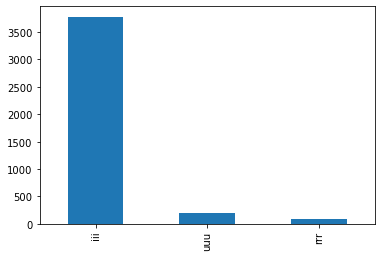

In [43]:
# Check distribution on COD feature
cod_dist = df_cat.COD.value_counts()
print(cod_dist)
cod_dist.plot.bar()

www    3425
aaa     608
nnn      37
Name: ERG, dtype: int64


<AxesSubplot:>

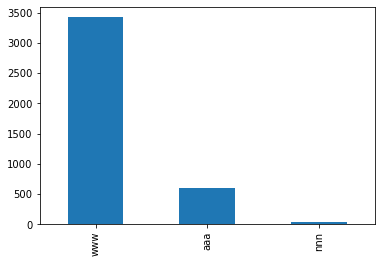

In [44]:
# Check distribution on ERG feature
erg_dist = df_cat.ERG.value_counts()
print(erg_dist)
erg_dist.plot.bar()

iii    3425
rrr     608
ii       37
Name: GJAH, dtype: int64


<AxesSubplot:>

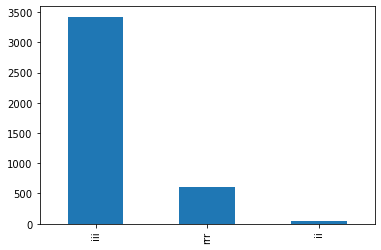

In [45]:
# Check distribution on GJAH feature
gjah_dist = df_cat.GJAH.value_counts()
print(gjah_dist)
gjah_dist.plot.bar()

f    2118
t    1952
Name: TOK, dtype: int64


<AxesSubplot:>

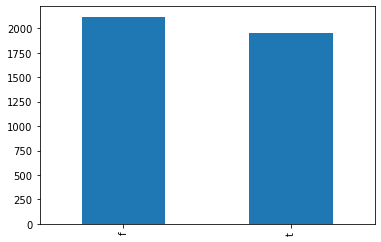

In [46]:
# Check distribution on PKD feature
tok_dist = df_cat.TOK.value_counts()
print(tok_dist)
tok_dist.plot.bar()

t    3488
f     582
Name: VOL, dtype: int64


<AxesSubplot:>

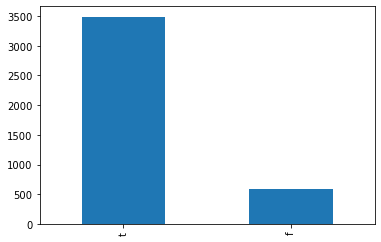

In [47]:
# Check distribution on PKD feature
vol_dist = df_cat.VOL.value_counts()
print(vol_dist)
vol_dist.plot.bar()

ddd    2664
ccc    1406
Name: KAT, dtype: int64


<AxesSubplot:>

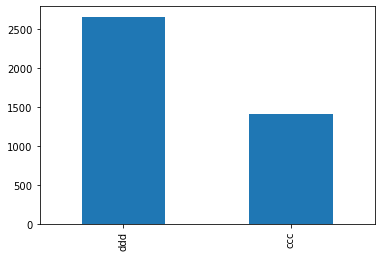

In [48]:
# Check distribution on PKD feature
kat_dist = df_cat.KAT.value_counts()
print(kat_dist)
kat_dist.plot.bar()

t    2457
f    1613
Name: XIN, dtype: int64


<AxesSubplot:>

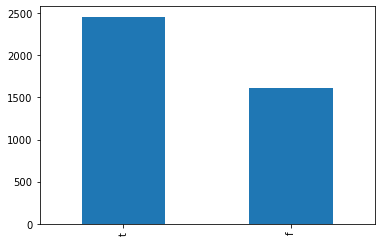

In [49]:
# Check distribution on XIN feature
xin_dist = df_cat.XIN.value_counts()
print(xin_dist)
xin_dist.plot.bar()

In [50]:
df_cat.columns

Index(['COD', 'ERG', 'GJAH', 'TOK', 'VOL', 'KAT', 'XIN', 'Class', 'MYR_eee',
       'MYR_sss', 'MYR_ee', 'MYR_yyy', 'MYR_zzz', 'MYR_kkk', 'MYR_ooo',
       'MYR_mmm', 'MYR_ggg', 'MYR_hh', 'PKD_xxx', 'PKD_jjj', 'PKD_ff',
       'PKD_hh', 'PKD_bbb'],
      dtype='object')

In [51]:
# Lets dummify rest of the categorical features into 1's and 0's
cat_cols = ['COD', 'ERG', 'GJAH', 'TOK', 'VOL', 'KAT', 'XIN'] 
df_cat = pd.get_dummies(df_cat, columns = cat_cols, drop_first=True)
df_cat.head()

,Class,MYR_eee,MYR_sss,MYR_ee,MYR_yyy,MYR_zzz,MYR_kkk,MYR_ooo,MYR_mmm,MYR_ggg,...,COD_rrr,COD_uuu,ERG_nnn,ERG_www,GJAH_iii,GJAH_rrr,TOK_t,VOL_t,KAT_ddd,XIN_t
0,n,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
1,n,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,n,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
3,n,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,n,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0


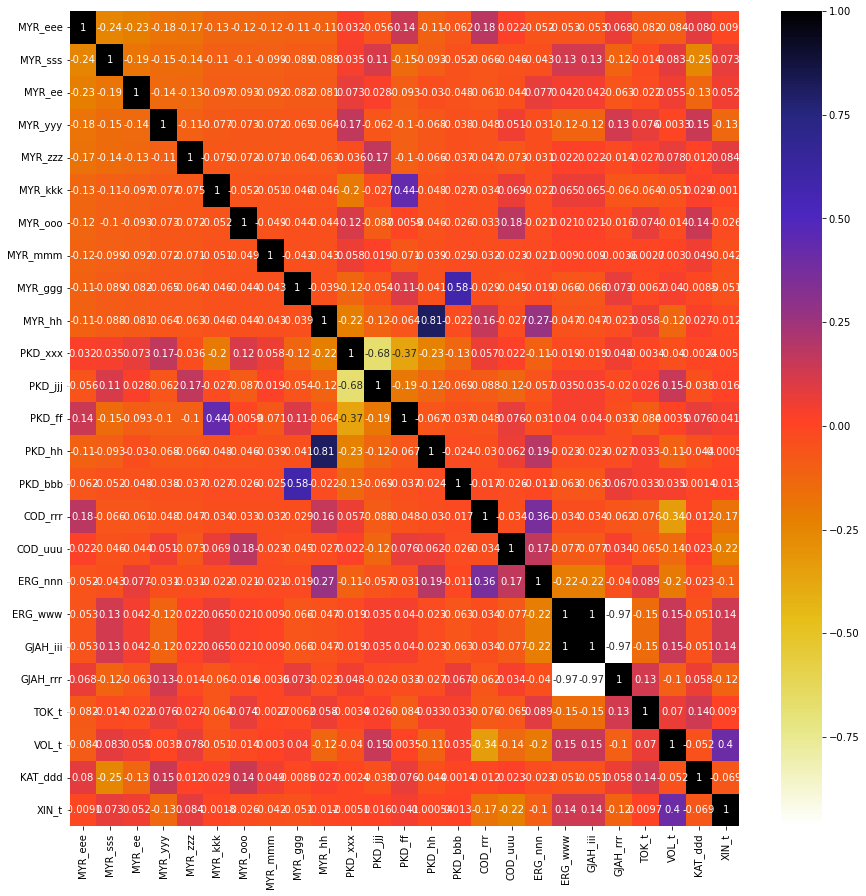

In [52]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(15,15))
cor = df_cat.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

**Quick Note:**
* We can see the presence of highly corelated features, so let's utlize the correlation function to drop them

In [53]:
# find and remove correlated features

threshold = .9

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df_cat.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [54]:
corr_features = correlation(df_cat, threshold)
print(len(set(corr_features)))
corr_features

2


{'GJAH_iii', 'GJAH_rrr'}

**These are the features that are over 90% correlated, so lets drop them off**

In [55]:
df_cat = df_cat.drop(corr_features, axis=1)
df_cat.head()

,Class,MYR_eee,MYR_sss,MYR_ee,MYR_yyy,MYR_zzz,MYR_kkk,MYR_ooo,MYR_mmm,MYR_ggg,...,PKD_hh,PKD_bbb,COD_rrr,COD_uuu,ERG_nnn,ERG_www,TOK_t,VOL_t,KAT_ddd,XIN_t
0,n,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,n,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,n,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
3,n,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,n,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0


In [56]:
#join two dataframes
df_processed = pd.concat([df_num, df_cat], axis=1, join="inner")
df_processed

,BIB,FAN,LUK,SIS,UIN,WET,Class,MYR_eee,MYR_sss,MYR_ee,...,PKD_hh,PKD_bbb,COD_rrr,COD_uuu,ERG_nnn,ERG_www,TOK_t,VOL_t,KAT_ddd,XIN_t
0,0.893258,0.068966,0.00005,0.061404,0.062707,0.014925,n,1,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0.853933,0.172414,0.00000,0.010175,0.047669,0.000000,n,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.022472,0.082759,0.00019,0.000000,0.263158,0.014925,n,0,0,0,...,1,0,0,0,0,1,0,0,1,1
3,0.044944,0.000000,0.00120,0.011754,0.517594,0.000000,n,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.219101,0.200000,0.00000,0.017544,0.279398,0.000000,n,0,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,0.865169,0.000000,0.00500,0.192982,0.587669,0.208955,y,0,1,0,...,0,0,0,0,0,1,0,1,0,1
4066,0.067416,0.086207,0.00003,0.026316,0.081504,0.104478,y,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4067,0.101124,0.392241,0.01236,0.175439,0.345865,0.000000,y,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4068,0.410112,0.103448,0.26726,0.029298,0.142857,0.000000,y,0,1,0,...,0,0,0,0,0,1,0,1,1,0


In [57]:
# Lets get our train and test datasets
X = df_processed.drop(["Class"], axis = 1)
y = df_processed["Class"]

In [58]:
# Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
import math, time, random, datetime
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_model(algo, X_train, y_train, cv):
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, X_train,  y_train,  cv=cv,   n_jobs = -1)
                                                                                                                                              
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv


In [61]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_model(LogisticRegression(), X_train, y_train, 10)
                                                                                                                                 
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 94.26
Accuracy CV 10-Fold: 94.07
Running Time: 0:00:04.459274


In [62]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_model(KNeighborsClassifier(), X_train, y_train, 10)  
                                                  
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 96.87
Accuracy CV 10-Fold: 96.07
Running Time: 0:00:02.023949


In [63]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_model(GaussianNB(), X_train, y_train, 10)  
                                                  
                                                                      
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 44.56
Accuracy CV 10-Fold: 44.56
Running Time: 0:00:00.230558


In [64]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_model(LinearSVC(), X_train, y_train, 10)
                                                               
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 94.81
Accuracy CV 10-Fold: 94.47
Running Time: 0:00:00.484521


In [65]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_model(DecisionTreeClassifier(), X_train, y_train, 10)
                                                               
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 97.11
Running Time: 0:00:00.346684


In [66]:
# Random Forest Classifier
start_time = time.time()
train_pred_rf, acc_rf, acc_cv_rf = fit_model(RandomForestClassifier(), X_train, y_train, 10)
                                                               
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 97.94
Running Time: 0:00:03.452261


In [67]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_model(GradientBoostingClassifier(), X_train, y_train, 10)
                                                                      
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 98.53
Accuracy CV 10-Fold: 97.54
Running Time: 0:00:05.382799


In [68]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_model(SGDClassifier(), X_train, y_train, 10)
                                                 
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 95.42
Accuracy CV 10-Fold: 94.44
Running Time: 0:00:00.318656


In [69]:
# Adaptive Gradient Boosting Trees
start_time = time.time()
train_pred_adagb, acc_adagb, acc_cv_adagb = fit_model(AdaBoostClassifier(), X_train, y_train, 10)
                                                                      
adagb_time = (time.time() - start_time)
print("Accuracy: %s" % acc_adagb)
print("Accuracy CV 10-Fold: %s" % acc_cv_adagb)
print("Running Time: %s" % datetime.timedelta(seconds = adagb_time))

Accuracy: 96.62
Accuracy CV 10-Fold: 96.16
Running Time: 0:00:04.318095


In [70]:
# Extreme Gradient Boosting Trees
start_time = time.time()
train_pred_xgb, acc_xgb, acc_cv_xgb = fit_model(GradientBoostingClassifier(), X_train, y_train, 10)
                                                                      
xgb_time = (time.time() - start_time)
print("Accuracy: %s" % acc_xgb)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb)
print("Running Time: %s" % datetime.timedelta(seconds = xgb_time))

Accuracy: 98.56
Accuracy CV 10-Fold: 97.57
Running Time: 0:00:05.574832


### Let's put these results in a nice dataframe

In [71]:

models = pd.DataFrame({
    'Model': ['Logistic Regression Classifier', 'K - Nearest Neighbour Classifier', 'Naive Bayes Classifier', 
              'Linear Support Vector Classifier',
              'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Trees Classifier',
              'Stochastic Gradient Descent Classifier', 'Adaptive Gradient Boosting Trees Classifier (AdaBoost)',
              'Extreme Gradient Boosting Trees (XGBoost)'],
    
    'Score': [
        acc_log, 
        acc_knn,  
        acc_gaussian, 
        acc_linear_svc, 
        acc_dt,
        acc_rf,
        acc_gbt,
        acc_sgd, 
        acc_adagb,
        acc_xgb
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
4,Decision Tree Classifier,100.00
5,Random Forest Classifier,100.00
9,Extreme Gradient Boosting Trees (XGBoost),98.56
6,Gradient Boosting Trees Classifier,98.53
1,K - Nearest Neighbour Classifier,96.87
8,Adaptive Gradient Boosting Trees Classifier (A...,96.62
7,Stochastic Gradient Descent Classifier,95.42
3,Linear Support Vector Classifier,94.81
0,Logistic Regression Classifier,94.26
2,Naive Bayes Classifier,44.56


In [72]:
cv_models = pd.DataFrame({
    'Model': ['Logistic Regression Classifier', 'K - Nearest Neighbour Classifier', 'Naive Bayes Classifier', 
              'Linear Support Vector Classifier',
              'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Trees Classifier',
              'Stochastic Gradient Descent Classifier', 'Adaptive Gradient Boosting Trees Classifier (AdaBoost)',
              'Extreme Gradient Boosting Trees (XGBoost)'],
    'Score': [
        acc_cv_log, 
        acc_cv_knn,  
        acc_cv_gaussian, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_rf,
        acc_cv_gbt,
        acc_cv_sgd, 
        acc_cv_adagb,
        acc_cv_xgb
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
5,Random Forest Classifier,97.94
9,Extreme Gradient Boosting Trees (XGBoost),97.57
6,Gradient Boosting Trees Classifier,97.54
4,Decision Tree Classifier,97.11
8,Adaptive Gradient Boosting Trees Classifier (A...,96.16
1,K - Nearest Neighbour Classifier,96.07
3,Linear Support Vector Classifier,94.47
7,Stochastic Gradient Descent Classifier,94.44
0,Logistic Regression Classifier,94.07
2,Naive Bayes Classifier,44.56


**Conclusion** :
* In case of an overfitted model (low bias and high variance): Pick up the best performing models from above, Run cross validations using gridsearch and perform hyperparameter optimization
* Save the model as a pickle file and deploy it as a web serivce 